In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.available

['seaborn-colorblind',
 'seaborn-bright',
 'seaborn-notebook',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'seaborn-deep',
 'fast',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'seaborn-talk',
 'seaborn-pastel',
 'dark_background',
 'seaborn-ticks',
 'seaborn-poster',
 'seaborn-muted',
 'fivethirtyeight',
 'grayscale',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-white',
 'seaborn-darkgrid',
 '_classic_test',
 'classic',
 'seaborn-dark']

In [3]:
# sns.heatmap(correlation_matrix,
#             annot=True,
#             linewidths=0.4,
#             annot_kws={"size": 10})

### import data

In [4]:
appointments = pd.read_csv('Appointments.csv')

In [5]:
calls = pd.read_csv('CallsRingCentral.csv')

In [6]:
reason_for_visit = pd.read_csv('MeetingReasonForVisits.csv')

In [7]:
meeting_status = pd.read_csv('MeetingStatus.csv')

In [8]:
offices = pd.read_csv('Offices.csv')

In [9]:
providers_schedules = pd.read_csv('ProvidersSchedulesLastest.csv')

### explore data

In [10]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44511 entries, 0 to 44510
Data columns (total 16 columns):
id                         44511 non-null int64
Patient                    44486 non-null float64
PatientAgeMeetingDate      44511 non-null int64
PatientGender              36679 non-null object
PatientState               36595 non-null object
PatientCity                36679 non-null float64
PatientInsurance           27567 non-null object
Provider                   44263 non-null float64
Specialty                  42022 non-null object
AppointmentDate            44511 non-null object
AppointmentDuration        44511 non-null int64
AppointmentCreated         44492 non-null object
MeetingReasonForVisitId    44511 non-null int64
MeetingStatusId            44511 non-null int64
OfficeId                   44511 non-null int64
CreatedBy                  39531 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 5.4+ MB


In [11]:
appointments.head().T

,0,1,2,3,4
id,1298688,1298687,1296287,1296286,1296285
Patient,3.0591e+08,3.06984e+08,3.05762e+08,2.9874e+08,3.04613e+08
PatientAgeMeetingDate,19,16,60,17,33
PatientGender,M,M,M,M,F
PatientState,CA,CA,CA,CA,CA
PatientCity,914,902,902,902,902
PatientInsurance,Optum Behavioral Health,Anthem Blue Cross - California,NaN,Anthem PPO/HMO,Aetna PPO
Provider,19,29,14,9,24
Specialty,Medical,Marriage & Family Therapist,Medical,Psych/Mental Health,Marriage & Family Therapist
AppointmentDate,2018-06-30 11:30:00,2018-06-28 19:00:00,2018-06-28 16:00:00,2018-06-27 10:00:00,2018-06-26 18:00:00


In [12]:
reason_for_visit.head()

,Id,Name,Description
0,3,QME Testing,QME Testing
1,4,Follow up,Follow up
2,5,New Patient MD Adult,New Patient MD Adult
3,6,Follow up Telepsychiatry,Follow up Telepsychiatry
4,7,New Patient MD Adult Telepsychiatry,New Patient MD Adult Telepsychiatry


In [13]:
reason_for_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Id             100 non-null int64
Name           100 non-null object
Description    100 non-null object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [14]:
len(reason_for_visit['Name'].unique())

100

In [15]:
meeting_status.head()

,Id,Name,Description
0,1,Active,The visit has not yet occurred
1,2,Left Message,the staff has left a reminder message for the ...
2,3,Confirmed,the staff confirmed with the patient that they...
3,4,Visit Created,the staff has given the patient a tentative ap...
4,5,Checked In,the patient has shown up to for the visit


In [16]:
meeting_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
Id             15 non-null int64
Name           15 non-null object
Description    15 non-null object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


In [17]:
offices.head()

,id,Name
0,1,Downtown
1,2,Hermosa Beach
2,3,Ontario
3,4,Palm Springs
4,5,San Diego


In [18]:
offices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
id      12 non-null int64
Name    12 non-null object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [19]:
providers_schedules.head()

,ProviderId,OfficeId,DayOfWeek,Session1_Start,Session1_End,Session2_Start,Session2_End
0,7,4,2,10:00 a. m.,06:00 p. m.,NaN,NaN
1,7,4,3,10:00 a. m.,06:00 p. m.,NaN,NaN
2,7,4,4,10:00 a. m.,06:00 p. m.,NaN,NaN
3,7,4,5,10:00 a. m.,06:00 p. m.,NaN,NaN
4,9,2,3,09:30 a. m.,06:30 p. m.,NaN,NaN


In [20]:
providers_schedules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
ProviderId        55 non-null int64
OfficeId          55 non-null int64
DayOfWeek         55 non-null int64
Session1_Start    55 non-null object
Session1_End      55 non-null object
Session2_Start    1 non-null object
Session2_End      1 non-null object
dtypes: int64(3), object(4)
memory usage: 3.1+ KB


In [21]:
calls.head().T

,0,1,2,3,4
id,266086,266087,266088,266089,266090
startTime,2018-04-18 10:35:28,2018-04-18 08:42:04,2018-04-18 08:22:02,2018-04-18 08:19:57,2018-04-18 08:02:47
duration,47,54,7,9,53
type,Fax,Fax,Voice,Voice,Fax
direction,Inbound,Inbound,Inbound,Inbound,Inbound
action,Incoming Fax,Incoming Fax,Phone Call,Phone Call,Incoming Fax
result,Received,Received,Missed,Missed,Received
From_extension,NaN,NaN,NaN,NaN,NaN
From_location,"Orange, CA","Elk Grove, IL","San Diego, CA","San Diego, CA",NaN
From_usertype,NaN,NaN,NaN,NaN,NaN


In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236880 entries, 0 to 236879
Data columns (total 15 columns):
id                236880 non-null int64
startTime         236880 non-null object
duration          236880 non-null int64
type              236880 non-null object
direction         236880 non-null object
action            236880 non-null object
result            236880 non-null object
From_extension    20635 non-null float64
From_location     101998 non-null object
From_usertype     93758 non-null object
From_userid       93212 non-null float64
To_extension      19735 non-null float64
To_location       92414 non-null object
To_usertype       6118 non-null object
To_userid         4957 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 27.1+ MB


### combine/merge dataframes

In [23]:
merged1 = pd.merge(left=appointments, right=reason_for_visit, how='left', left_on='MeetingReasonForVisitId',\
                  right_on='Id')

In [24]:
appointments.shape, reason_for_visit.shape, merged1.shape

((44511, 16), (100, 3), (44511, 19))

In [25]:
merged1 = merged1.rename(columns={'MeetingReasonForVisitId': 'ReasonForVisitId', 'Name':'ReasonForVisitName', 'Description':'ReasonForVisitDescription'})

In [26]:
merged1.drop('Id', axis=1, inplace=True)

In [27]:
# merged1.head().T

In [28]:
# merge in office name from offices df
merged1 = pd.merge(left=merged1, right=offices, how='left', left_on='OfficeId', right_on='id')

In [29]:
merged1 = merged1.rename(columns={'Name':'OfficeName', 'id_x':'id'})

In [30]:
merged1.drop('id_y', axis=1, inplace=True)

In [31]:
merged1 = pd.merge(left=merged1, right=meeting_status, how='left', left_on='MeetingStatusId', right_on='Id')

In [32]:
merged1 = merged1.rename(columns={'Name':'MeetingStatusName', 'Description':'MeetingStatusDescription'})

In [33]:
merged1.drop('Id', axis=1, inplace=True)

In [34]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44511 entries, 0 to 44510
Data columns (total 21 columns):
id                           44511 non-null int64
Patient                      44486 non-null float64
PatientAgeMeetingDate        44511 non-null int64
PatientGender                36679 non-null object
PatientState                 36595 non-null object
PatientCity                  36679 non-null float64
PatientInsurance             27567 non-null object
Provider                     44263 non-null float64
Specialty                    42022 non-null object
AppointmentDate              44511 non-null object
AppointmentDuration          44511 non-null int64
AppointmentCreated           44492 non-null object
ReasonForVisitId             44511 non-null int64
MeetingStatusId              44511 non-null int64
OfficeId                     44511 non-null int64
CreatedBy                    39531 non-null float64
ReasonForVisitName           44511 non-null object
ReasonForVisitDescription 

In [35]:
merged1.head().T

,0,1,2,3,4
id,1298688,1298687,1296287,1296286,1296285
Patient,3.0591e+08,3.06984e+08,3.05762e+08,2.9874e+08,3.04613e+08
PatientAgeMeetingDate,19,16,60,17,33
PatientGender,M,M,M,M,F
PatientState,CA,CA,CA,CA,CA
PatientCity,914,902,902,902,902
PatientInsurance,Optum Behavioral Health,Anthem Blue Cross - California,NaN,Anthem PPO/HMO,Aetna PPO
Provider,19,29,14,9,24
Specialty,Medical,Marriage & Family Therapist,Medical,Psych/Mental Health,Marriage & Family Therapist
AppointmentDate,2018-06-30 11:30:00,2018-06-28 19:00:00,2018-06-28 16:00:00,2018-06-27 10:00:00,2018-06-26 18:00:00


In [36]:
# rearrange column order to group releveant columns together
merged1.columns

Index(['id', 'Patient', 'PatientAgeMeetingDate', 'PatientGender',
       'PatientState', 'PatientCity', 'PatientInsurance', 'Provider',
       'Specialty', 'AppointmentDate', 'AppointmentDuration',
       'AppointmentCreated', 'ReasonForVisitId', 'MeetingStatusId', 'OfficeId',
       'CreatedBy', 'ReasonForVisitName', 'ReasonForVisitDescription',
       'OfficeName', 'MeetingStatusName', 'MeetingStatusDescription'],
      dtype='object')

In [37]:
ordered_columns = ['id', 'Patient', 'PatientAgeMeetingDate', 'PatientGender',
       'PatientState', 'PatientCity', 'PatientInsurance', 'Provider',
       'Specialty', 'AppointmentDate', 'AppointmentCreated', 'AppointmentDuration', 'ReasonForVisitId', 'ReasonForVisitName',
       'ReasonForVisitDescription','MeetingStatusId', 'MeetingStatusName',
       'MeetingStatusDescription', 'OfficeId',  'OfficeName', 'CreatedBy']

In [38]:
merged1 = merged1[ordered_columns]

In [39]:
# remove time component from AppointmentDate and AppointmentCreated columns

In [40]:
merged1['AppointmentCreated'] = merged1['AppointmentCreated'].str.slice(start=0, stop=10)

In [41]:
merged1['AppointmentDate'] = merged1['AppointmentDate'].str.slice(start=0, stop=10)

In [42]:
# merged1.head().T

In [43]:
# pd.value_counts(merged1['PatientState'])

In [44]:
# pd.value_counts(merged1['PatientGender'])

In [45]:
# pd.value_counts(merged1['PatientCity'])

In [46]:
# pd.value_counts(merged1['MeetingStatusName'])

In [47]:
# pd.value_counts(merged1['AppointmentDuration'])

In [48]:
pd.value_counts(merged1['Specialty'])

Medical                                    10726
Psych/Mental Health                         9127
Physician Assistant                         6694
Child & Adolescent Psychiatry               4977
Psychiatry                                  3553
Psych/Mental Health, Child & Adolescent     3067
Marriage & Family Therapist                 1951
Clinical                                     911
Psychologist                                 627
Specialist/Technologist, Other               389
Name: Specialty, dtype: int64

In [49]:
# convert date columns to datetime 
merged1['AppointmentDate'] = pd.to_datetime(merged1['AppointmentDate']).apply(lambda x: x.date()) #,format='%Y-%m-%d')

In [50]:
merged1['AppointmentCreated'] = pd.to_datetime(merged1['AppointmentCreated']).apply(lambda x: x.date()) #, format='%Y-%m-%d')

In [51]:
# calculate time between AppointmentCreated and AppointmentDate
merged1['DaysFromAppointmentCreatedToVisit'] = (merged1['AppointmentDate'] - merged1['AppointmentCreated']).dt.days

In [52]:
merged1.head().T

,0,1,2,3,4
id,1298688,1298687,1296287,1296286,1296285
Patient,3.0591e+08,3.06984e+08,3.05762e+08,2.9874e+08,3.04613e+08
PatientAgeMeetingDate,19,16,60,17,33
PatientGender,M,M,M,M,F
PatientState,CA,CA,CA,CA,CA
PatientCity,914,902,902,902,902
PatientInsurance,Optum Behavioral Health,Anthem Blue Cross - California,NaN,Anthem PPO/HMO,Aetna PPO
Provider,19,29,14,9,24
Specialty,Medical,Marriage & Family Therapist,Medical,Psych/Mental Health,Marriage & Family Therapist
AppointmentDate,2018-06-30,2018-06-28,2018-06-28,2018-06-27,2018-06-26


In [53]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44511 entries, 0 to 44510
Data columns (total 22 columns):
id                                   44511 non-null int64
Patient                              44486 non-null float64
PatientAgeMeetingDate                44511 non-null int64
PatientGender                        36679 non-null object
PatientState                         36595 non-null object
PatientCity                          36679 non-null float64
PatientInsurance                     27567 non-null object
Provider                             44263 non-null float64
Specialty                            42022 non-null object
AppointmentDate                      44511 non-null object
AppointmentCreated                   44492 non-null object
AppointmentDuration                  44511 non-null int64
ReasonForVisitId                     44511 non-null int64
ReasonForVisitName                   44511 non-null object
ReasonForVisitDescription            44511 non-null object
Meeting

In [54]:
merged1['Specialty'].isnull()
merged1.isnull().sum()

id                                       0
Patient                                 25
PatientAgeMeetingDate                    0
PatientGender                         7832
PatientState                          7916
PatientCity                           7832
PatientInsurance                     16944
Provider                               248
Specialty                             2489
AppointmentDate                          0
AppointmentCreated                      19
AppointmentDuration                      0
ReasonForVisitId                         0
ReasonForVisitName                       0
ReasonForVisitDescription                0
MeetingStatusId                          0
MeetingStatusName                        0
MeetingStatusDescription                 0
OfficeId                                 0
OfficeName                               0
CreatedBy                             4980
DaysFromAppointmentCreatedToVisit       19
dtype: int64

In [55]:
# pd.value_counts(merged1['DaysFromAppointmentCreatedToVisit'])

In [56]:
merged1[merged1['DaysFromAppointmentCreatedToVisit'] < 0][['DaysFromAppointmentCreatedToVisit', 'AppointmentCreated', 'AppointmentDate']]

,DaysFromAppointmentCreatedToVisit,AppointmentCreated,AppointmentDate
6858,-19.0,2018-02-28,2018-02-09
8287,-1.0,2018-01-24,2018-01-23
8296,-1.0,2018-01-24,2018-01-23
8908,-8.0,2018-01-23,2018-01-15
14518,-1.0,2017-10-31,2017-10-30
19055,-1.0,2017-08-29,2017-08-28
21789,-3.0,2017-07-24,2017-07-21
29877,-1.0,2017-03-28,2017-03-27
32898,-14.0,2017-02-20,2017-02-06
36171,-7.0,2016-12-14,2016-12-07


In [57]:
merged1['AppointmentDate'] = pd.to_datetime(merged1['AppointmentDate'])
merged1['AppointmentCreated'] = pd.to_datetime(merged1['AppointmentCreated'])

In [58]:
merged1.dtypes

id                                            int64
Patient                                     float64
PatientAgeMeetingDate                         int64
PatientGender                                object
PatientState                                 object
PatientCity                                 float64
PatientInsurance                             object
Provider                                    float64
Specialty                                    object
AppointmentDate                      datetime64[ns]
AppointmentCreated                   datetime64[ns]
AppointmentDuration                           int64
ReasonForVisitId                              int64
ReasonForVisitName                           object
ReasonForVisitDescription                    object
MeetingStatusId                               int64
MeetingStatusName                            object
MeetingStatusDescription                     object
OfficeId                                      int64
OfficeName  

In [59]:
merged1.columns

Index(['id', 'Patient', 'PatientAgeMeetingDate', 'PatientGender',
       'PatientState', 'PatientCity', 'PatientInsurance', 'Provider',
       'Specialty', 'AppointmentDate', 'AppointmentCreated',
       'AppointmentDuration', 'ReasonForVisitId', 'ReasonForVisitName',
       'ReasonForVisitDescription', 'MeetingStatusId', 'MeetingStatusName',
       'MeetingStatusDescription', 'OfficeId', 'OfficeName', 'CreatedBy',
       'DaysFromAppointmentCreatedToVisit'],
      dtype='object')

In [60]:
pd.value_counts(merged1['Specialty'])

Medical                                    10726
Psych/Mental Health                         9127
Physician Assistant                         6694
Child & Adolescent Psychiatry               4977
Psychiatry                                  3553
Psych/Mental Health, Child & Adolescent     3067
Marriage & Family Therapist                 1951
Clinical                                     911
Psychologist                                 627
Specialist/Technologist, Other               389
Name: Specialty, dtype: int64

In [61]:
medical = merged1[merged1['Specialty'] == 'Medical']

In [62]:
pd.value_counts(medical['ReasonForVisitName'])

Follow up Telepsychiatry                3894
Follow up                               3686
Therapy                                 1294
New Patient MD Adult                     694
Therapy Telepsychiatry                   551
New Patient MD Adult Telepsychiatry      361
New Patient MD Child                     157
New Patient MD Child Telepsychiatry       45
BLOCK                                     32
Blocked day                                2
New Patient Therapy                        1
DO NOT SCHEDULE 2PM-7PM                    1
DO NOT SCHEDULE NEW PATIENTS IN DTLA       1
BLOCK SCHEDULE                             1
Day blocked                                1
hour blocked                               1
blocked time                               1
schedule hour blocked                      1
Therapy Tapy Telepsychiatry                1
blocked                                    1
Name: ReasonForVisitName, dtype: int64

In [63]:
medical1 = medical.set_index('AppointmentDate')

In [64]:
# medical1.groupby('ReasonForVisitName').agg({'ReasonForVisitName': 'count'})

In [65]:
# medical1.groupby('ReasonForVisitId').agg({'ReasonForVisitId': 'count'})

In [66]:
merged2 = merged1.set_index('AppointmentDate')

In [67]:
merged_index_month = merged2.index.month

In [68]:
merged_index_year = merged2.index.year

In [69]:
merged2.index.date

array([datetime.date(2018, 6, 30), datetime.date(2018, 6, 28),
       datetime.date(2018, 6, 28), ..., datetime.date(2016, 6, 1),
       datetime.date(2016, 6, 1), datetime.date(2016, 6, 1)], dtype=object)

In [73]:
specialty_counts = merged2.groupby([merged_index_year, merged_index_month, 'Specialty'])['Specialty'].count()

In [74]:
specialty_counts = merged2.groupby([merged_index_year, merged_index_month, 'Specialty'])['Specialty'].count()

In [75]:
specialty_counts

AppointmentDate  AppointmentDate  Specialty                              
2016             6                Child & Adolescent Psychiatry              243
                                  Clinical                                    64
                                  Medical                                    269
                                  Psych/Mental Health                        338
                                  Psychiatry                                 109
                                  Psychologist                                23
                 7                Child & Adolescent Psychiatry              237
                                  Clinical                                    81
                                  Medical                                    260
                                  Psych/Mental Health                        290
                                  Psychiatry                                  83
                                  P

In [76]:
type(specialty_counts)

pandas.core.series.Series

In [77]:
specialty = merged2[['Specialty']].dropna(axis=0)

In [79]:
specialty.isnull().sum()

Specialty    0
dtype: int64

In [80]:
a_index_year = specialty.index.year
a_index_month = specialty.index.month

In [81]:
a_index_month

Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='AppointmentDate', length=42022)

In [95]:
specialty_df = pd.DataFrame(specialty.groupby([a_index_year, a_index_month, 'Specialty'])['Specialty'].count().unstack('Specialty'))

In [96]:
specialty_df

Specialty                        Child & Adolescent Psychiatry  Clinical  \
AppointmentDate AppointmentDate                                            
2016            6                                        243.0      64.0   
                7                                        237.0      81.0   
                8                                        268.0     104.0   
                9                                        222.0     122.0   
                10                                       206.0      89.0   
                11                                       216.0      80.0   
                12                                       189.0      73.0   
2017            1                                        230.0      71.0   
                2                                        212.0      67.0   
                3                                        251.0      79.0   
                4                                        226.0      64.0   
                5                                        244.0      17.0   
                6                                        200.0       NaN   
                7                                        202.0       NaN   
                8                                        215.0       NaN   
                9                                        172.0       NaN   
                10                                       211.0       NaN   
                11                                       211.0       NaN   
                12                                       144.0       NaN   
2018            1                                        234.0       NaN   
                2                                        173.0       NaN   
                3                                        195.0       NaN   
                4                                        198.0       NaN   
                5                                         73.0       NaN   
                6                                          5.0       NaN   

Specialty                        Marriage & Family Therapist  Medical  \
AppointmentDate AppointmentDate                                         
2016            6                                        NaN    269.0   
                7                                        NaN    260.0   
                8                                        NaN    270.0   
                9                                        NaN    292.0   
                10                                       NaN    431.0   
                11                                       NaN    417.0   
                12                                       NaN    327.0   
2017            1                                        NaN    452.0   
                2                                        NaN    455.0   
                3                                        NaN    557.0   
                4                                       32.0    541.0   
                5                                       70.0    594.0   
                6                                      112.0    593.0   
                7                                      100.0    524.0   
                8                                      118.0    612.0   
                9                                       90.0    574.0   
                10                                     126.0    592.0   
                11                                     169.0    488.0   
                12                                     147.0    470.0   
2018            1                                      187.0    538.0   
                2                                      162.0    449.0   
                3                                      260.0    505.0   
                4                                      284.0    387.0   
                5                                       81.0    109.0   
                6                                

In [97]:
specialty_bfilled = specialty_df.fillna(method='bfill')

In [84]:
cols = list(specialty_df.columns)
means = specialty_df[cols].mean()
means.index

Index(['Child & Adolescent Psychiatry', 'Clinical',
       'Marriage & Family Therapist', 'Medical', 'Physician Assistant',
       'Psych/Mental Health', 'Psych/Mental Health, Child & Adolescent',
       'Psychiatry', 'Psychologist', 'Specialist/Technologist, Other'],
      dtype='object', name='Specialty')

In [85]:
# fill missing values with column mean
for idx in means.index:
    specialty_df[idx].fillna(means[idx], inplace=True)

In [86]:
specialty_df

Specialty                        Child & Adolescent Psychiatry    Clinical  \
AppointmentDate AppointmentDate                                              
2016            6                                        243.0   64.000000   
                7                                        237.0   81.000000   
                8                                        268.0  104.000000   
                9                                        222.0  122.000000   
                10                                       206.0   89.000000   
                11                                       216.0   80.000000   
                12                                       189.0   73.000000   
2017            1                                        230.0   71.000000   
                2                                        212.0   67.000000   
                3                                        251.0   79.000000   
                4                                        226.0   64.000000   
                5                                        244.0   17.000000   
                6                                        200.0   75.916667   
                7                                        202.0   75.916667   
                8                                        215.0   75.916667   
                9                                        172.0   75.916667   
                10                                       211.0   75.916667   
                11                                       211.0   75.916667   
                12                                       144.0   75.916667   
2018            1                                        234.0   75.916667   
                2                                        173.0   75.916667   
                3                                        195.0   75.916667   
                4                                        198.0   75.916667   
                5                                         73.0   75.916667   
                6                                          5.0   75.916667   

Specialty                        Marriage & Family Therapist  Medical  \
AppointmentDate AppointmentDate                                         
2016            6                                 130.066667    269.0   
                7                                 130.066667    260.0   
                8                                 130.066667    270.0   
                9                                 130.066667    292.0   
                10                                130.066667    431.0   
                11                                130.066667    417.0   
                12                                130.066667    327.0   
2017            1                                 130.066667    452.0   
                2                                 130.066667    455.0   
                3                                 130.066667    557.0   
                4                                  32.000000    541.0   
                5                                  70.000000    594.0   
                6                                 112.000000    593.0   
                7                                 100.000000    524.0   
                8                                 118.000000    612.0   
                9                                  90.000000    574.0   
                10                                126.000000    592.0   
                11                                169.000000    488.0   
                12                                147.000000    470.0   
2018            1                                 187.000000    538.0   
                2                                 162.000000    449.0   
                3                                 260.000000    505.0   
                4                                 284.000000    387.0   
                5                                  81.000000    109.

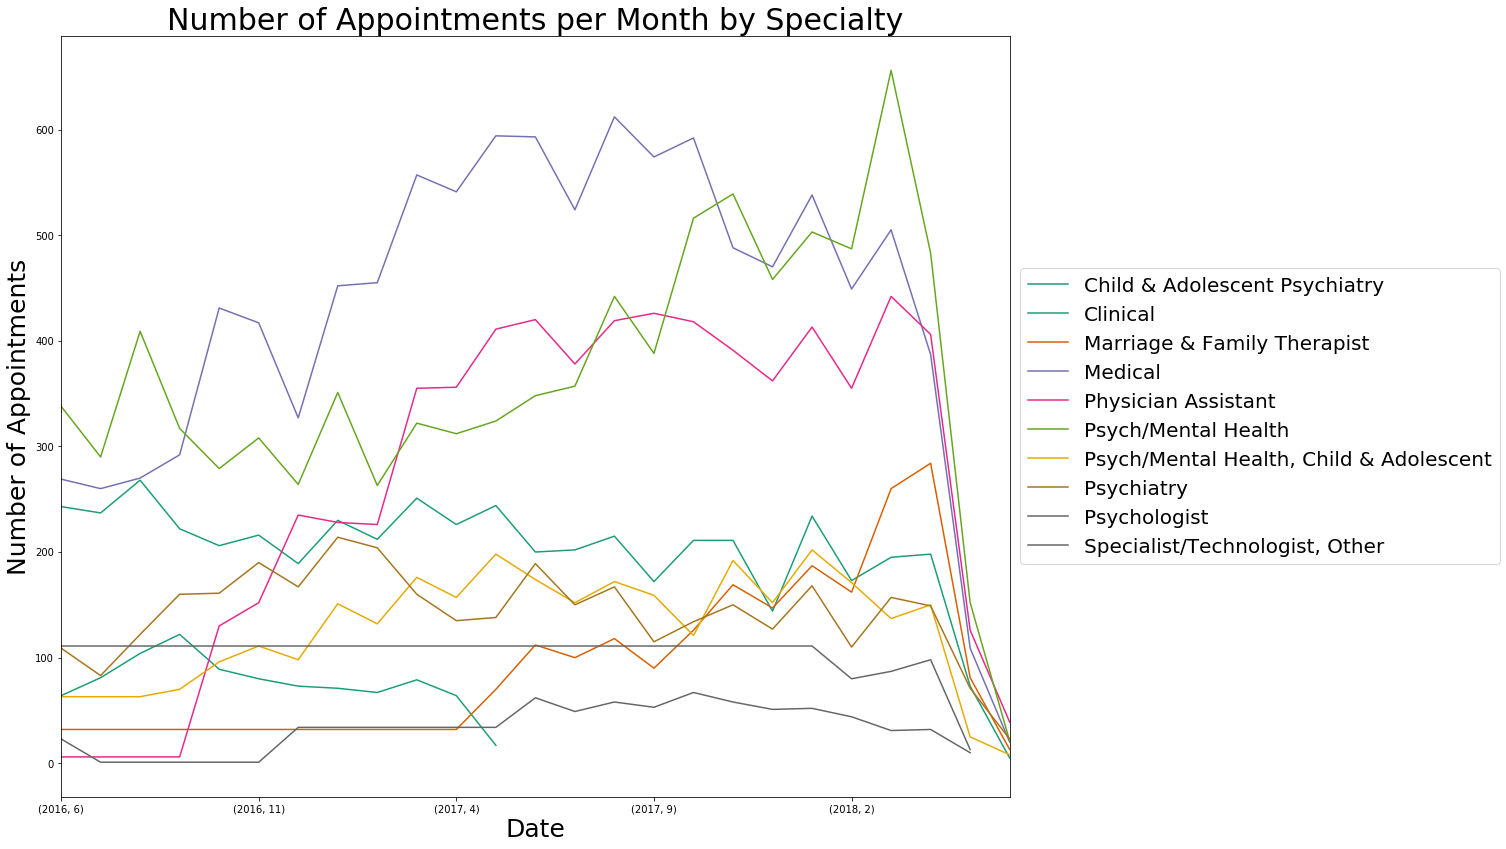

In [99]:
# using bfill to fill NaN values
ax = specialty_bfilled.plot(figsize=(17,14), colormap='Dark2')
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

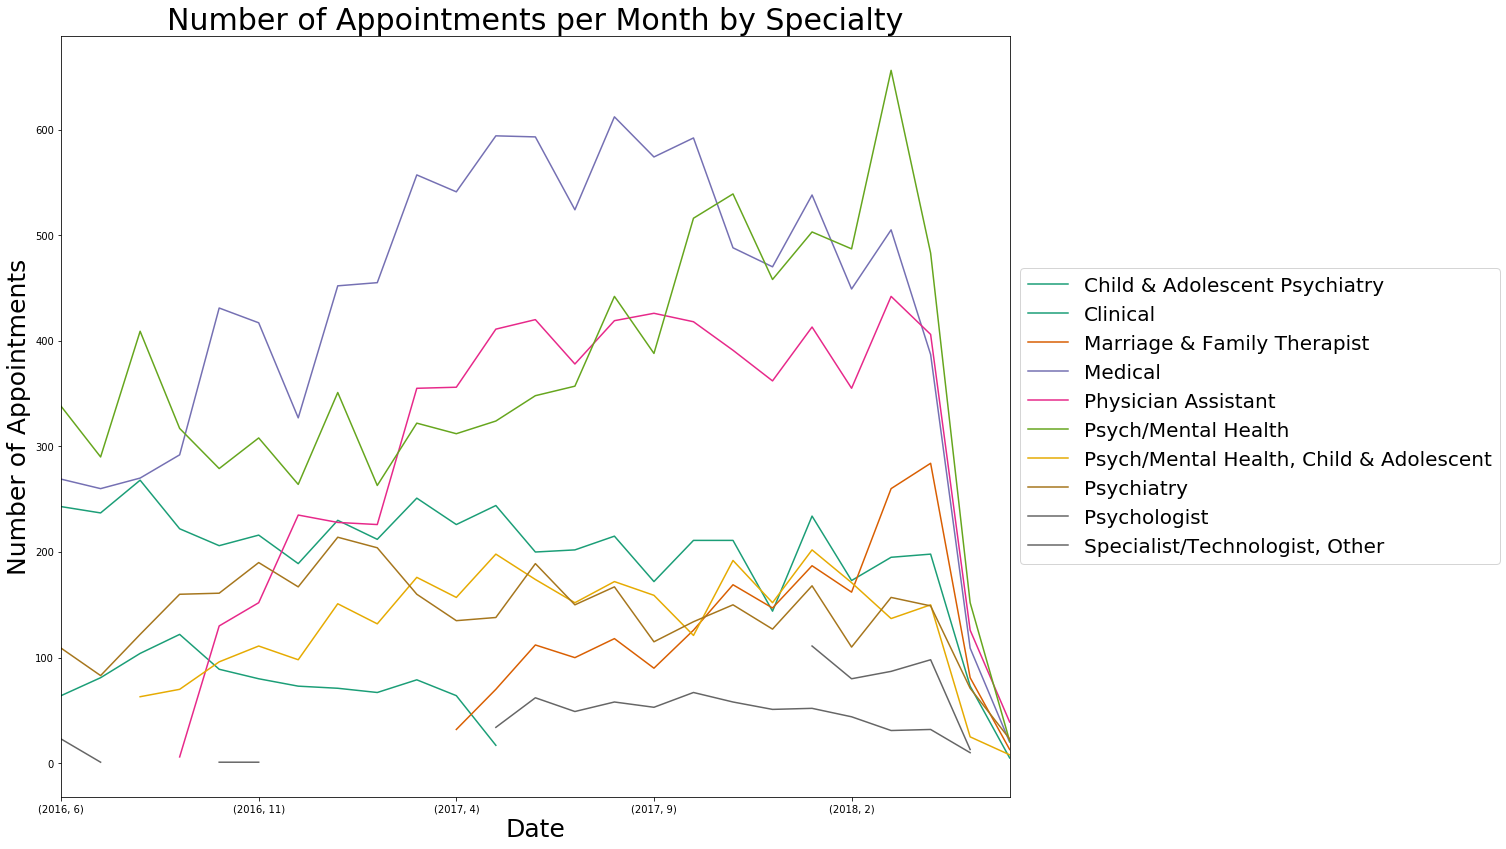

In [100]:
# if NaNs are filled by column mean
ax = specialty_df.plot(figsize=(17,14), colormap='Dark2')
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

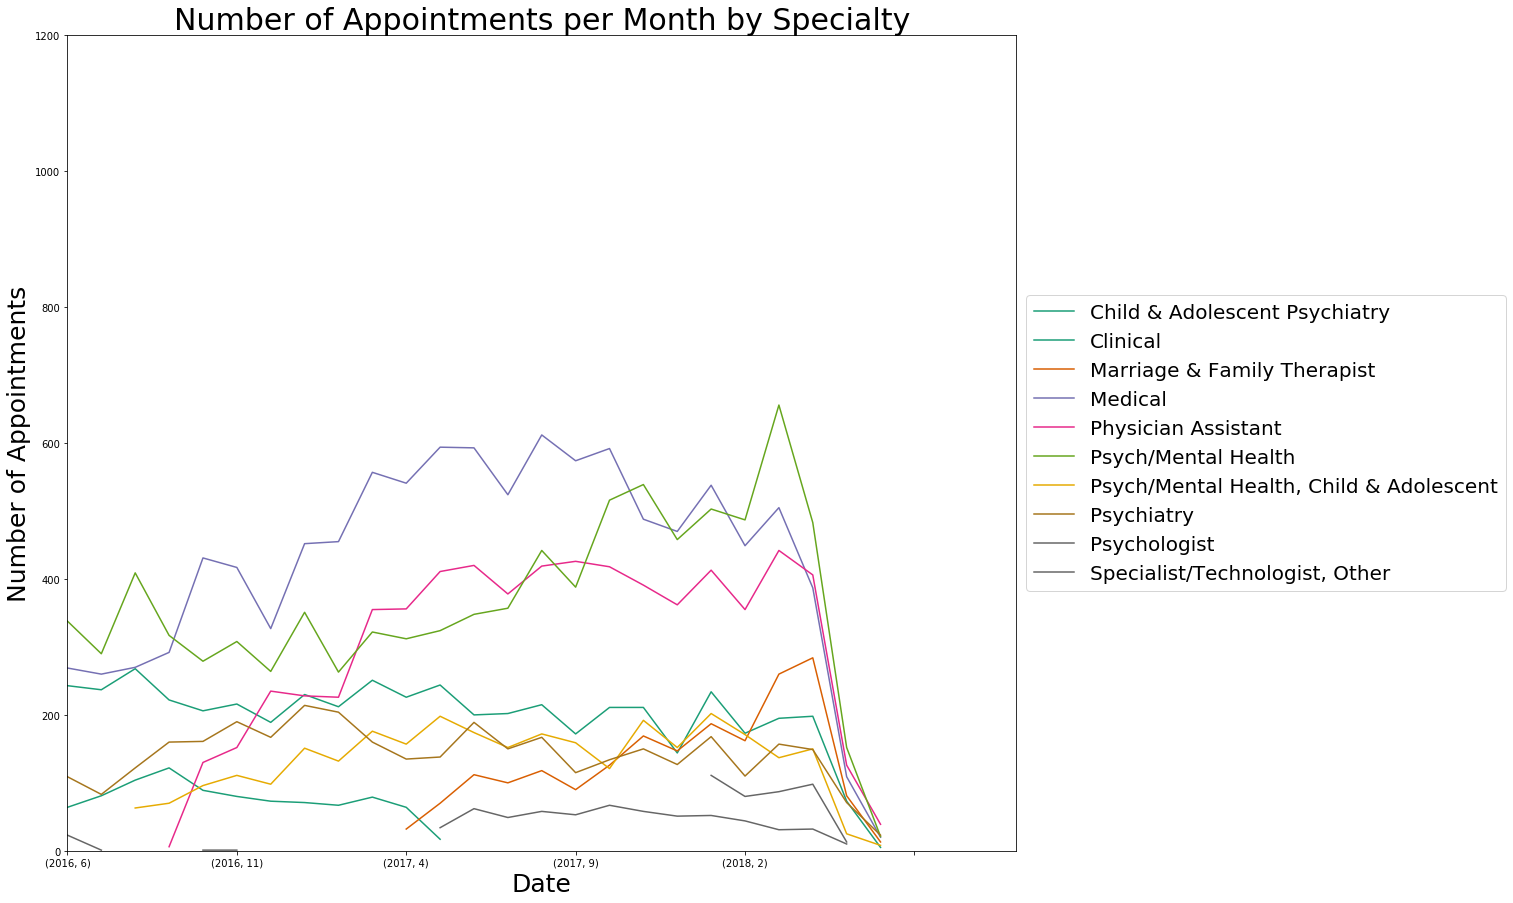

In [101]:
# plot number of appoints by specialty for each month, adding multiple years
ax = specialty.groupby([a_index_year, a_index_month, 'Specialty'])['Specialty'].count().unstack('Specialty').plot(figsize=(17,15),\
                                                    colormap='Dark2')
ax.set_ylim(0, 1200)
ax.set_xlim(0,28)
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

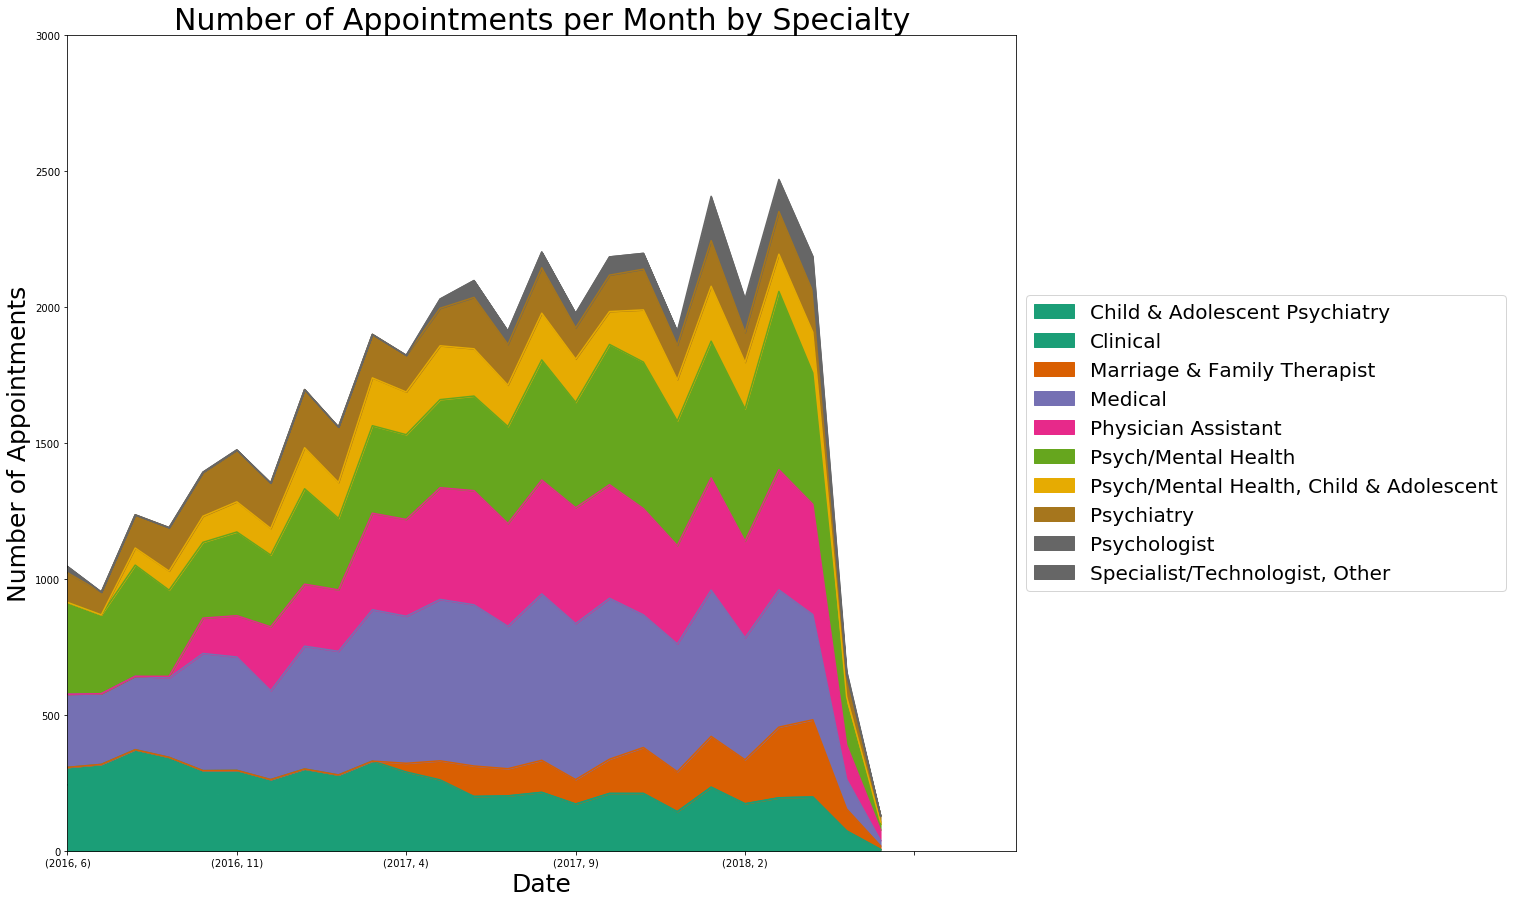

In [102]:
# plot number of appoints by specialty for each month, adding multiple years
ax = specialty.groupby([a_index_year, a_index_month, 'Specialty'])['Specialty'].count().unstack('Specialty').plot.area(figsize=(17,15),\
                                                    colormap='Dark2')
ax.set_ylim(0, 3000)
ax.set_xlim(0,28)
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

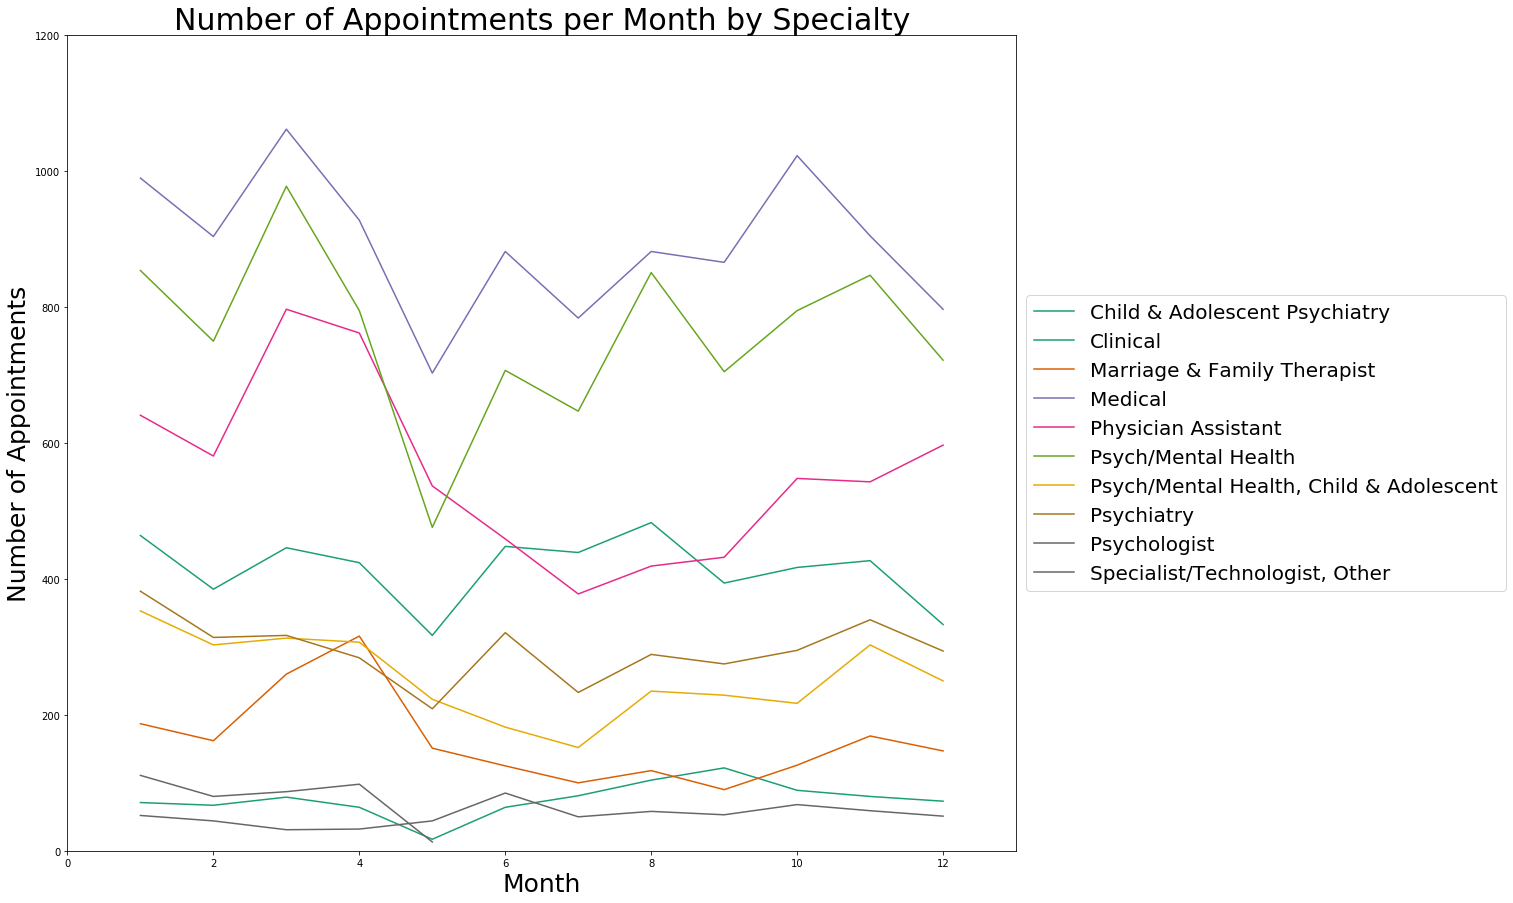

In [107]:
# plot number of appoints by specialty for each month, adding months from multiple years together
ax = merged2.groupby([merged_index_month, 'Specialty'])['Specialty'].count().unstack().plot(figsize=(17,15),\
                                                    colormap='Dark2')
ax.set_ylim(0, 1200)
ax.set_xlim(0,13)
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

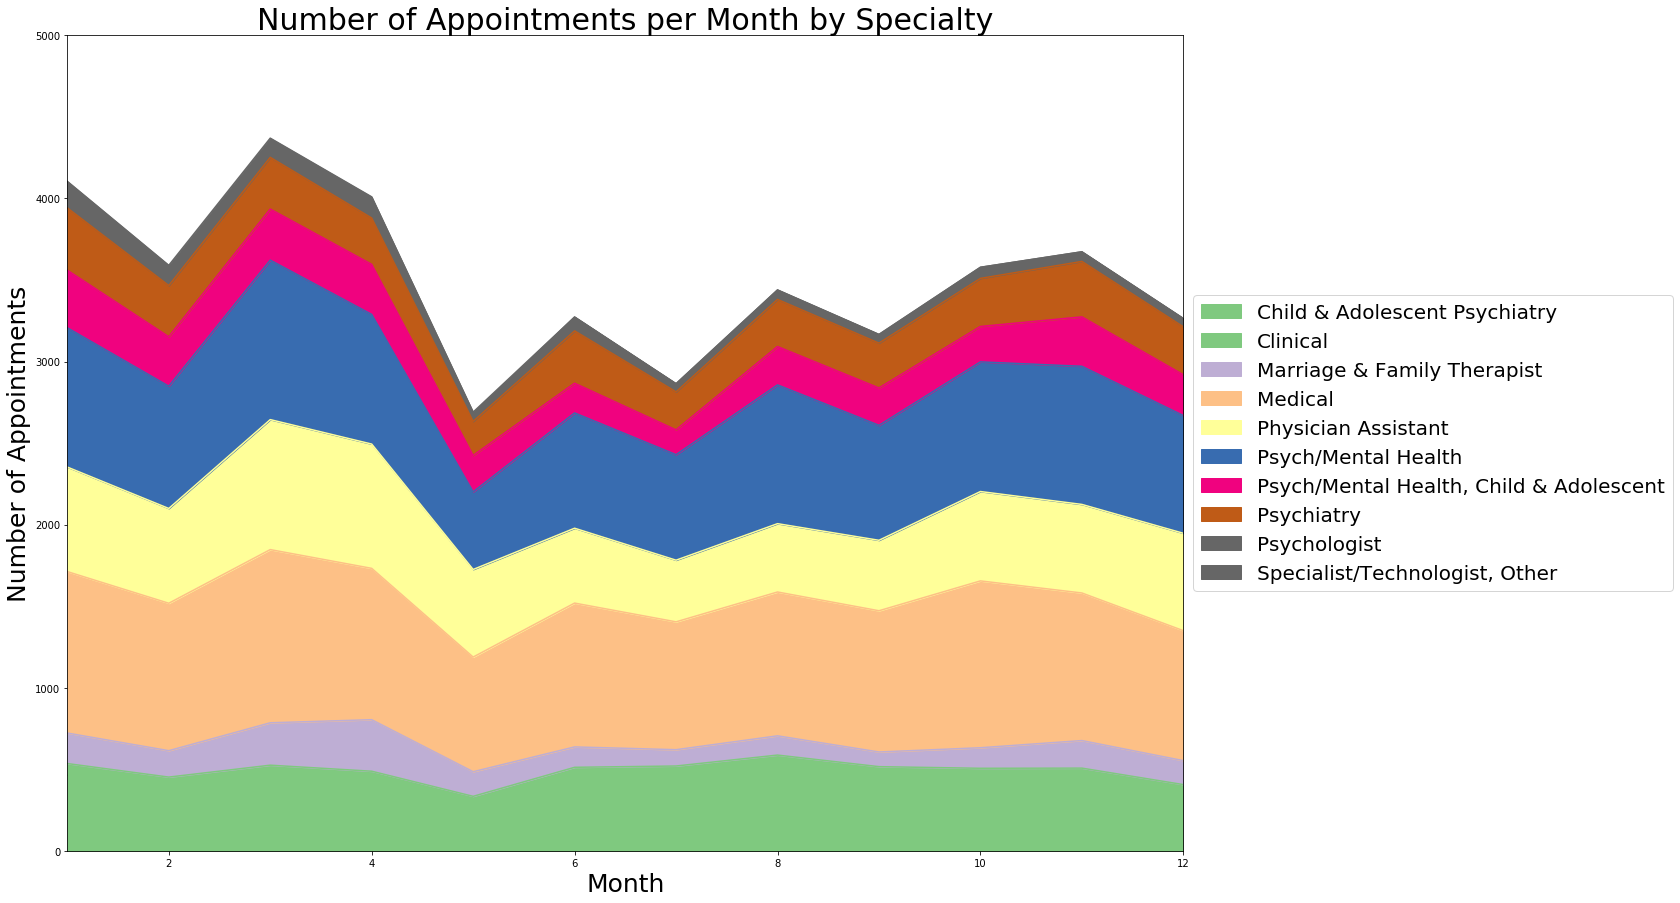

In [108]:
# plot number of appoints by specialty for each month, adding months from multiple years together
ax = merged2.groupby([merged_index_month, 'Specialty'])['Specialty'].count().unstack().plot.area(figsize=(20,15),\
                                                                                                colormap='Accent')
ax.set_ylim(0, 5000)
ax.set_xlim(1, 12)
ax.set_title('Number of Appointments per Month by Specialty', fontsize=30)
ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Number of Appointments', fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

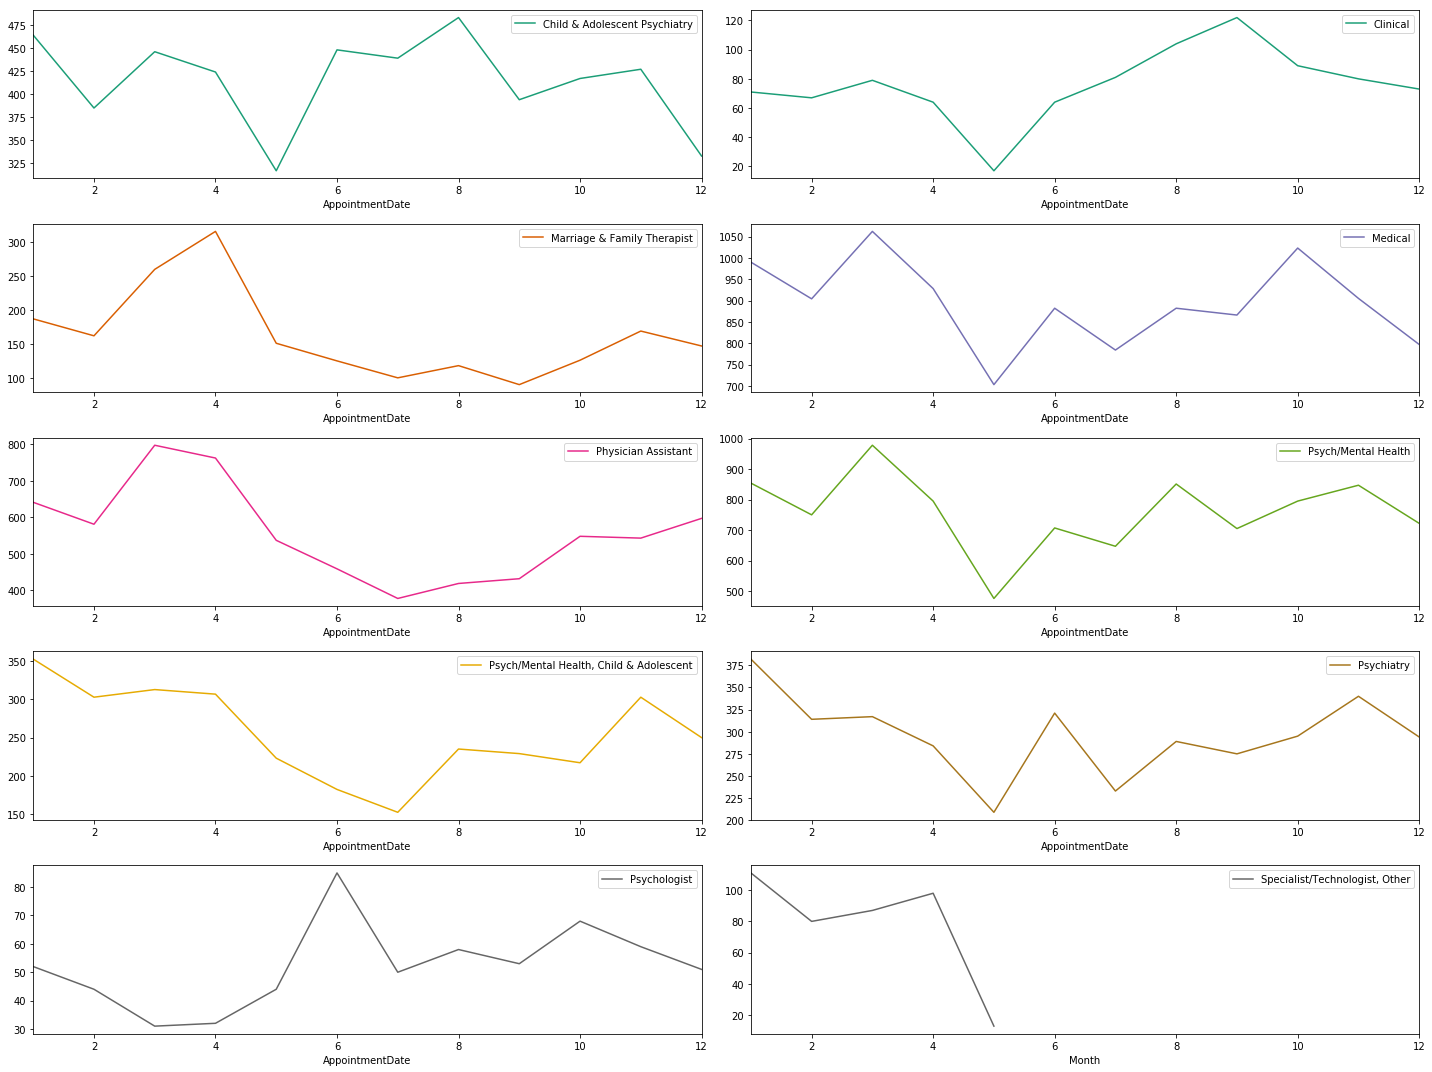

In [88]:
ax = merged2.groupby([merged_index_month, 'Specialty'])['Specialty'].count().unstack().plot(subplots=True,\
                        colormap='Dark2', figsize=(20,15), layout=(5,2), sharex=False, sharey=False)
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [71]:
medical1['id'].groupby(medical1.index.month).count()

AppointmentDate
1      990
2      904
3     1062
4      928
5      703
6      882
7      784
8      882
9      866
10    1023
11     905
12     797
Name: id, dtype: int64

In [92]:
medical1.columns

Index(['id', 'Patient', 'PatientAgeMeetingDate', 'PatientGender',
       'PatientState', 'PatientCity', 'PatientInsurance', 'Provider',
       'Specialty', 'AppointmentCreated', 'AppointmentDuration',
       'ReasonForVisitId', 'ReasonForVisitName', 'ReasonForVisitDescription',
       'MeetingStatusId', 'MeetingStatusName', 'MeetingStatusDescription',
       'OfficeId', 'OfficeName', 'CreatedBy',
       'DaysFromAppointmentCreatedToVisit'],
      dtype='object')

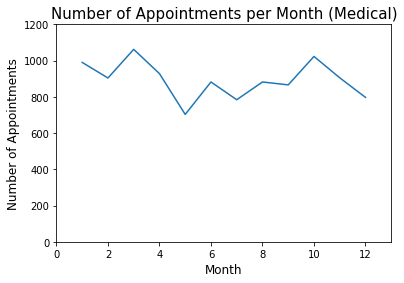

In [93]:
index_month = medical1.index.month
counts = medical1['id'].groupby(index_month).count()
ax = counts.plot()
ax.set_ylim(0, 1200)
ax.set_xlim(0, 13)
ax.set_title('Number of Appointments per Month (Medical)', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Appointments', fontsize=12)
plt.show()

In [94]:
medical1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10726 entries, 2018-06-30 to 2016-06-01
Data columns (total 21 columns):
id                                   10726 non-null int64
Patient                              10716 non-null float64
PatientAgeMeetingDate                10726 non-null int64
PatientGender                        9140 non-null object
PatientState                         9133 non-null object
PatientCity                          9140 non-null float64
PatientInsurance                     7263 non-null object
Provider                             10726 non-null float64
Specialty                            10726 non-null object
AppointmentCreated                   10717 non-null datetime64[ns]
AppointmentDuration                  10726 non-null int64
ReasonForVisitId                     10726 non-null int64
ReasonForVisitName                   10726 non-null object
ReasonForVisitDescription            10726 non-null object
MeetingStatusId                      10726 no

In [ ]:
number_cols = ['Provider', 'ReasonForVisitId', 'MeetingStatusId', 'OfficeId', 'DaysFromAppointmentCreatedToVisit']
nummeric = merged2[number_cols]

In [ ]:
nummeric.head()

In [ ]:
days_until_appointment = nummeric['DaysFromAppointmentCreatedToVisit']

In [ ]:
days_until_appointment.head()

In [ ]:
# ax = days_until_appointment.plot(x=days_until_appointment.index, kind='hist', figsize=(12,6))
# ax.set_xlabel('Appointment Date', fontsize=16)
# # ax.set_ylabel('Count of each visit type')
# plt.show()

In [ ]:
nummeric.index